<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1608768000&v=beta&t=2xuCh9kIGEeB_dLvnbLm9tAOzMU3dAvyssm5tbazr7c" width="1000"></center>

# Programa de Especialización en Python

## Tema 6. Redes Neuronales con H2O API

### Prof. Manuel Sigüeñas, M.Sc.(c)

In [2]:
library(png)
library(grid)

## Dependiencias 

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tabulate

  Stored in directory: C:\Users\SOCIAL DATA\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install "colorama>=0.3.8"

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install future

Note: you may need to restart the kernel to use updated packages.


https://www.h2o.ai/products/

<a id='part1'></a>
# Instalación de H2O

In [2]:
#Instalar H2O
#"pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [3]:
#pip install http://h2o-release.s3.amazonaws.com/h2o/rel-yu/2/Python/h2o-3.28.0.2-py2.py3-none-any.whl

In [4]:
import h2o

In [5]:
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpbq72bruf
  JVM stdout: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpbq72bruf\h2o_SOCIAL_DATA_started_from_python.out
  JVM stderr: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpbq72bruf\h2o_SOCIAL_DATA_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,5 months and 8 days !!!
H2O_cluster_name:,H2O_from_python_SOCIAL_DATA_lr6tbl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.526 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,58 secs
H2O cluster timezone:,America/Bogota
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.2
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_SOCIAL_DATA_qcijw1
H2O cluster total nodes:,1
H2O cluster free memory:,3.513 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


Cuando se inicializa h2o, se generará un mensaje que hace referencia a la conexión exitosa de la librería al cluster que realizará los cálculos. El parámetro nthreads = -1 se refiere a que se harán uso de todos los CPU disponibles del equipo para realizarlos.

La versión de H2O en CRAN podría estar hasta un mes o dos detrás de la última y mejor. A menos que se vea afectado por un error que sabe que se ha solucionado, no se preocupe. $h2o.init ()$ solo usará dos núcleos en su máquina y quizás una cuarta parte de la memoria de su sistema, 6 por defecto. Use $h2o.shutdown()$ para ver lo que hace. Luego, para comenzar de nuevo, pero usando todos los núcleos: $h2o.init (nthreads = -1)$. Y para darle, digamos, 4GB y todos sus núcleos: $h2o.init (nthreads = -1, max_mem_size = "4g")$.

In [6]:
h2o.init (nthreads = -1, max_mem_size = "4g")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 min 13 secs
H2O cluster timezone:,America/Bogota
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.2
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_SOCIAL_DATA_qcijw1
H2O cluster total nodes:,1
H2O cluster free memory:,3.513 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


#### Consideraciones:

1. Algunos sistemas requieren contar con Java para 64 bits. En la carpeta correspondiente a la sesión podemos encontrar el ejecutable: jdk-8u231-windows-x64.exe
2. Debemos tener una versión actualizada del clúster H2O. Nosotros trabajaremos con la versión 3.26.0.2 que se instalará desde el terminal de Windows con la siguiente sentencia: h2o.jar 

<a id='part2'></a>
# Implementar una red neuronal artificial multicapa desde cero

Como ya sabes, el aprendizaje profundo está captando toda la atención por parte de la prensa y es, sin lugar dudas, el tema más candente en el campo del aprendizaje automático. El apredizaje profundo se puede entender como un conjunto de algoritmos desarrollados para entender redes neuronales artificiales con varias capas de un modo más eficiente. En esta sesión, aprenderás los conceptos básicos de las redes nueronales artificiales para que estés bien equipado de cara a los proximo capítulos, en los cuales introduciremos avanzadas librería de aprendizaje profundo basados en Java, pero implementados en R y Python.

<a id='part3'></a>
# Modelar funciones complejas con redes nueronales artificiales.

Las neuronas artificiales representan los bloques de construcción de la redes neuronales artificiales multicapa que trataremos en esta clase. El concepto básico que hay detrás de las redes neuronales artificiales fue construido sobre hipótsis y modelos de como trabaja el cerebro humano para resolver problemas complejos. Aunque las redes neuronales artificiales han ganado mucha popularidad en los últimos años, los primeros estudios de redes neuronales se remontan a los años 40, cuando Warren McCulloch y Walter Pitt describieron por primera vez cómo trabajaban las neuronas.

Sim embargo, en las décadas que siguieron a la primera implentación del modelo de **neuronas McCulloch-Pitt-** el perceptrón de Rosenblatt en 50-, muchos investigadores y aprendizaje automático empezaron poco a poco a perder el interés por la redes neuronales, pues nadie tenia una buena solución para el entrenamiento de redes neuronales con multiples capas. Finalemente, el interés por las redes nueronales se reavivo en 1986, cuando D.E. Rumelhart, G.E. Hinton y R.J.Willian participaron en el (re)descubrimineto y la popularización del algoritmo de propagación hacia atrás para entrenar redes neuronales de forma más eficaz.

Sin embargo, las redes nueornales nunca han sido tan populares como lo son en la actualidad, gracias a los muchos avances importantes que se han llevado a cabo en la década anterior, que dieron como resultado lo que hoy llamamos algoritmos y arquitectura de aprendizaje profundo - redes neuronales compuestas por múltiples capas-. Las redes neuronales son un tema candente no solo en investigación académica sino tambien en grandes empresas tecnológicas como Facebook, Microsoft y Google, que invierten mucho dinero en investigación de aprendizaje profundo y redes neuronales artificiales. A día de hoy, las redes neuronales complejaws impulsadas por algoritmos de aprendizaje profundo consideran de vanguardia en lo que respecta a la resolución de problemas complejos, como el reconocimiento de imagen y voz. Algunos ejemplo populares de productos presentes en nuestra vida diaria impulsados por el aprendizaje profundo son la búsqueda de imágenes en google y el troducto de google- una para su palicación para $smartphones$ que pueden reconocer automáticamente texto en imágenes para su traducción en tiempo real en más de 20 idiomas-.

Muchas Aplicaciones excitantes de **DNN** han sido desarroladas en importantes empresas tecnológicas y en la industria farmaceútica, como se muestra en la siguiente lista- no exhaustiva- de ejemolos.
<br>

- DeepFace de Facebook para etiquetar imágenes, cierra la brecha en el rendimineto a nivel humano en verificación facial.
- DeepSpeechde Baidu, que es capaz de gestionar consultas por voz en mandarín. Ampliación del reconocimiento de voz de extremo a extremo.  
- El nuevo servicio de traducción de idiomas de Google. El sistema de traducción automática neuronal de Google .
- Nuevas técnicas para el descubrimiento de fármacos y la predicción de toxicidad. Predicción de toxicidad mediante aprendizaje profundo.
- Una aplicación móvil que puede detectar cáncer de piel con una precisión similar a los dermatólogos profesionales.

<a id='part4'></a>
## Resumen de una red neuronal de una capa

Esta sesión trata sobre redes neuronales multicapa, sobre como trabajan y como se entrenan para resolver problemas complejos. Sin embargo, antes de que nos sumerjamos más en la arquitectura de las redes neuronales multicapa, vamos a reiterar brevemente algunos de los conceptos de las redes neuronales de una capa. 

Warning message in readPNG("D:/R/3. Nivel III/5/imagenes/12_01.png"):
"libpng warning: iCCP: known incorrect sRGB profile"

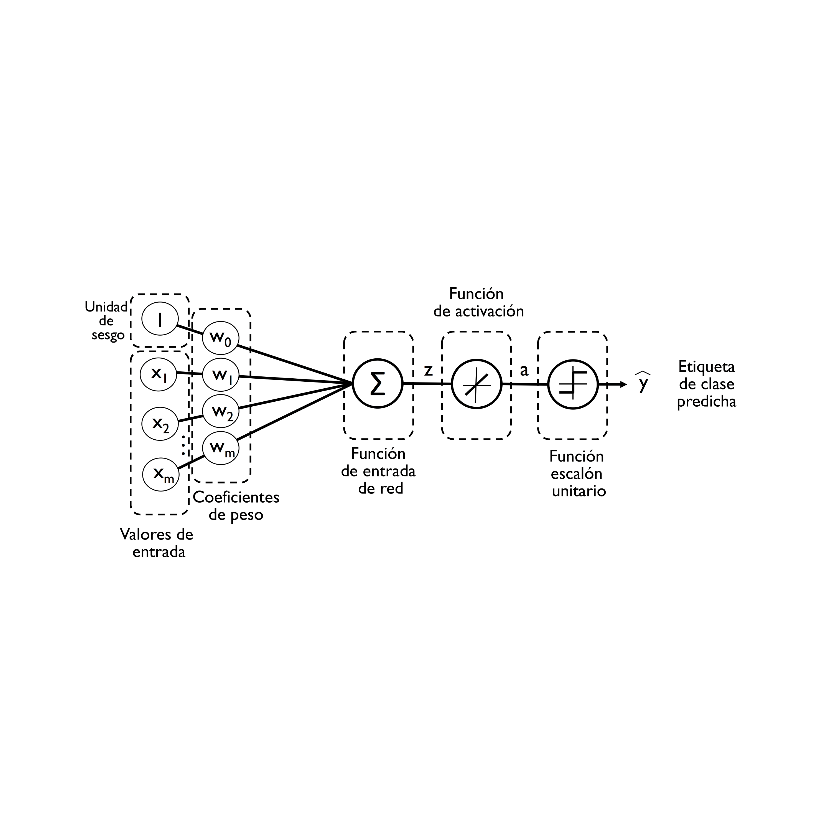

In [5]:
grid.raster(readPNG('D:/R/3. Nivel III/5/imagenes/12_01.png'), width=0.8)

Para realizar las clasificaciones binarias, se implementa el algoritmo Adaline y para aprender los coeficientes ponderados del modelo, se usa el algoritmo de optimización de descenso del gradiente. En cada paso por el conjunto de entrenamiento, actualizamos el vector de peso $w$ mediante la siguiente regla de actualización. 

$$ w := w + \bigtriangleup w, where \bigtriangleup w = -\eta\bigtriangledown J (w)$$

En otras palabras, computamos el gradiente según el conjunto de entrenamiento completo y actualizamos los pesos del modelo haciendo un paso en la dirección opuesta al gradiente $\bigtriangledown J(w)$. Con el fin de encontrar los pesos óptimos del modelo, optimizamos una función objetiva que definimos acomo función de coste de la **suma de los errores cuadráticos(SSE)** $\bigtriangledown  J(w)$. Ádemas, multiplicamos el gradiente por el factor, el ragon de aprendizaje $\eta,$ que tuvimos que elegier atentamente para equilibrar la velocidad del aprendizaje contra el riesgo de superar el mínimo global de la función coste. 

En la optimizacióndel descenso del gradiente, actualizamos todos los pesos a la vez despúes de cada época, y definimos la derivada parcial para cada peso w, en el vecto de peso $w$ del modo siguiente.


$$\frac{\partial}{\partial_j}J(w) = \sum_i \left(y^{(i)}-\alpha^{(i)}\right)x^{(i)}_j$$

Aquí, y(i) es la etiqueta de clase de destino de una muestra en particular x(i),y a(i) es la activación del a nuerona, una función lineal en el caso especial de Adaline. Ádemas, definimos la función de activación ϕ(.) del siguiente modo. 

$$\phi(z)=z=a$$

En este caso, la entrada de red z es una combinación lineal de los pesos que conectan la entrada a la capa de salida:

$$z=\Sigma_jw_jx_j = w^Tx$$

Al tiempo que utilizabamos la activación $\phi(z)$ para calcular la actualización del gradiente, implementamos una funcipon de umbral para comprimir la salida del valor continuo en etiquetas de clase binaria para la predicción.

$$
    \left.
        \begin{aligned}
            1 if g(z)\geq0\\
            -1 otherwise
        \end{aligned}
    \right\}
\quad\text{\hat{y}}
$$

Ádemas, aprendimos un truco para acelerar el aprendizaje del modelo: la denominada optimización del **descenso del gradiente estocástico**. El descenso del gradiente estocástico aproxima el coste a partir de una sola muestra de entrenamiento (aprendizaje online) o de un pequeño subconjunto de muestras de entrenamiento (aprendizaje por minilotes). Utilizaremos este concepto mas adelante en este capitulo, cuando implementamos y entrenamos un perceoton multicapa.  Aparte del aprendizajemás rapido - debido a las actualizaciones de pesos mas frecuentes en comparación con el descenso de gradiente-, su naturaleza ruidoasa ea algo que se ve como beneficioso cuando se entrenan redes neuronales multicapa con funciones de la activación no linea, las cuales no tienen una función de coste convexa. Áqui, el ruido añadido puede ayudar a escapar de los mínimos locales de coste, pero trataremos este tema con más detalle más adelante en este capítulo. 

<a id='part5'></a>
## La arquitectura de red neuronal multicapa

En esta sección, aprenderás cómo conectar múltiples neuronas simples a una red neuronal prealimentada multicapa; este tipo especial de red $completamente conectada$ también se denomina **Perceptron Multicapa(ML.P.**, de ingles $Multilayer Perceptron$). La siguiente imagen elustra el concepto de un MIP de tres capas.  

Warning message in readPNG("D:/R/3. Nivel III/5/imagenes/12_02.png"):
"libpng warning: iCCP: known incorrect sRGB profile"

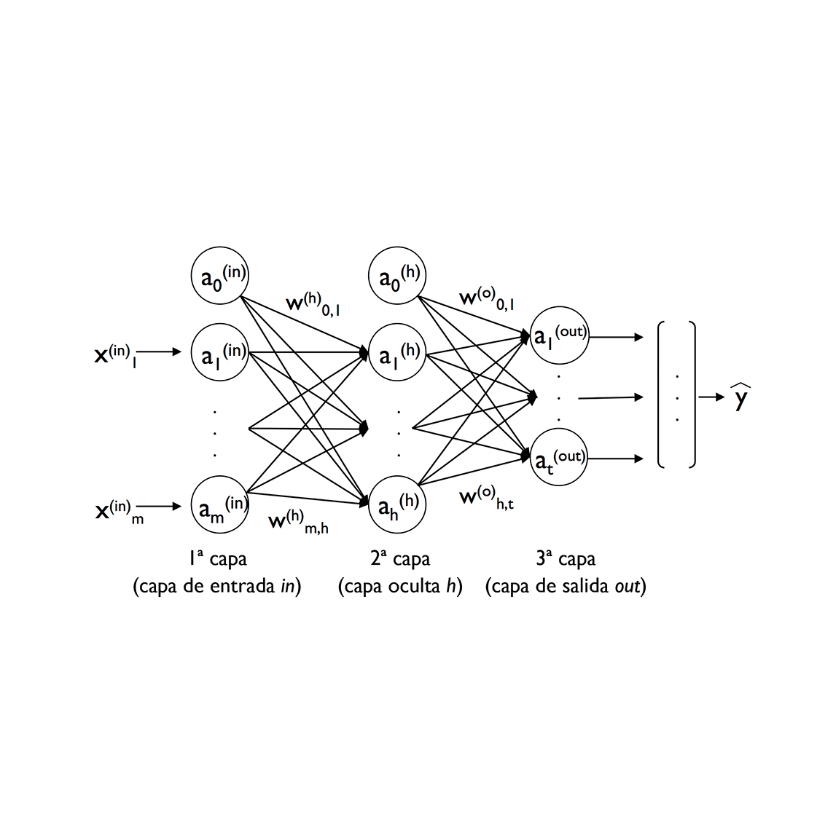

In [6]:
grid.raster(readPNG('D:/R/3. Nivel III/5/imagenes/12_02.png'), width=0.8)

El MLP representado en la imagen anterior tiene una capa de entrada, una capa oculta y una capa de salida. Las unidades en la capa oculta estan conectadas completamente a la capa de entrada, y la capa de salida está conectada completamente a la capa oculta. Si una red así tiene más de una capa oculta, también la denominamos **red neuronal artificial profunda**.  

Como se muestra en la figura anterior hemos presentado la unidad i de la activacion de la $l^{ra}$ capa como $a^{(l)}_i$. Para hacer que las implementaciones del código y de las mátematicas sean como mas intuitivas, no utilizaremos indices numéricos para referirnos a las capas sino el superíndice $in(input)$ para la capa de entrada, el superíndice $h (oculta)$ para la capa oculta, y en el superíndice $o(output)$ para la capa de salida. Por ejemplo, $a^{(in)}_i$ se refiere al valor $i^o$ en la capa de entrada; $a^{(h)}_i$, se refiere a la unidad $i^a$ en la capa oculta;y $a^{(out)}_i$ se refiere a la unidad $i^a$ en la capa de salida. 


En este caso, las unidades de activación $a^{(in)}_0a^{(h)}_0$ son las unidades de sesgo, que hemos configurado igual a 1. La activación de las unidades en la capa de entrada es sencillamente su entrada más la unidad de sesgo.

$$ a^{(in)}=\left[\begin{smallmatrix}
                a^{(in)}_0\\
                a^{(in)}_1\\
                .\\
                .\\
                .\\
                a^{(in)}_m
                \end{smallmatrix}\right]
= \left[\begin{smallmatrix}
                1\\
                x^{(in)}_1\\
                .\\
                .\\
                .\\
                x^{(in)}_m
                \end{smallmatrix}\right]
 $$

Cada undidad de la capa $l$ está conectada < todas las unidades de la capa $l + 1$ mediante un coeficiente ponderado. Por ejemplo, la conexión entre la unidad $k^a$ en la capa $l$ y la unidad $j^a$ en la capa $l+1$ desde escribirse como $w^{(l+1)}_{k,j}$. Volviendo a la imagen anterior, hemos representado la matriz ponderada que conecta la capa de entrada a la de salida como $W^{(h)}$, y hemos escrito la matriz que conecta la capa oculta a la de salidad como $W^{(out)}$. 

Mientras que una unidad en la capa de salida bastaría para una tarea de clasificación  binaria, en la imagen anterior hemos visto una forma más general de red neuronal, que nos permite realizar clasificaciones multiclase mediante una generalización de la técnica $One-versus-All(OvA)$. Para comprender mejor cómo funciona, recuerda la representación $one-hot$ de las variables categóricas que presentamos en el capítulo 4, Preprocesamiento de datos. Poe ejemplo, podemos codificar las tres etiquetas de clase en el conjunto de datos Iris $(0 = Setosa , 1 = Versicolor , 2 = Virginica ) $ de este modo:    

$$ 0=\left[\begin{smallmatrix}
                1\\
                0\\
                0\\
                \end{smallmatrix}\right]
.1= \left[\begin{smallmatrix}
                0\\
                1\\
                0\\
                \end{smallmatrix}\right]
.2= \left[\begin{smallmatrix}
                0\\
                0\\
                1\\
                \end{smallmatrix}\right]
$$

Esta presentación $one-hot$ de vectores nos permite abordar tareas de clasificación con un número arbitrario de etiquetas de clase únicas presentes en el conjunto de entrenamiento.

Si eres nuevo en esto de las representaciones de redes neuronales, la notación indexada (subíndices y superíndices) puede paracer un poco complicada dal principio. Lo que puede parecer realemente complicado al inicio tendrá mucho más sentido en secciones posteriores, cuando vectoricemos la representación de redes neuronales.
Como hemos indicado anteriormente, resumimos los pesos que conectan las capas de entrada y de ocultas mediante una matriz $W^{(h)} \in \Re^{m>d}$, donde d es el número de unidades ocultasy m es el número de unidades de entrada incluyendo la unidad de sesgo. Como resulta importante interiorizar esta notación parac seguir los conceptos que aparecen más adelante en este capítulo, vamos a resumir cuanto acabamos de aprender en una imagen descriptiva de un perceptrón multicapa 3-4-3 simplificado.

Warning message in readPNG("D:/R/3. Nivel III/5/imagenes/12_03.png"):
"libpng warning: iCCP: known incorrect sRGB profile"

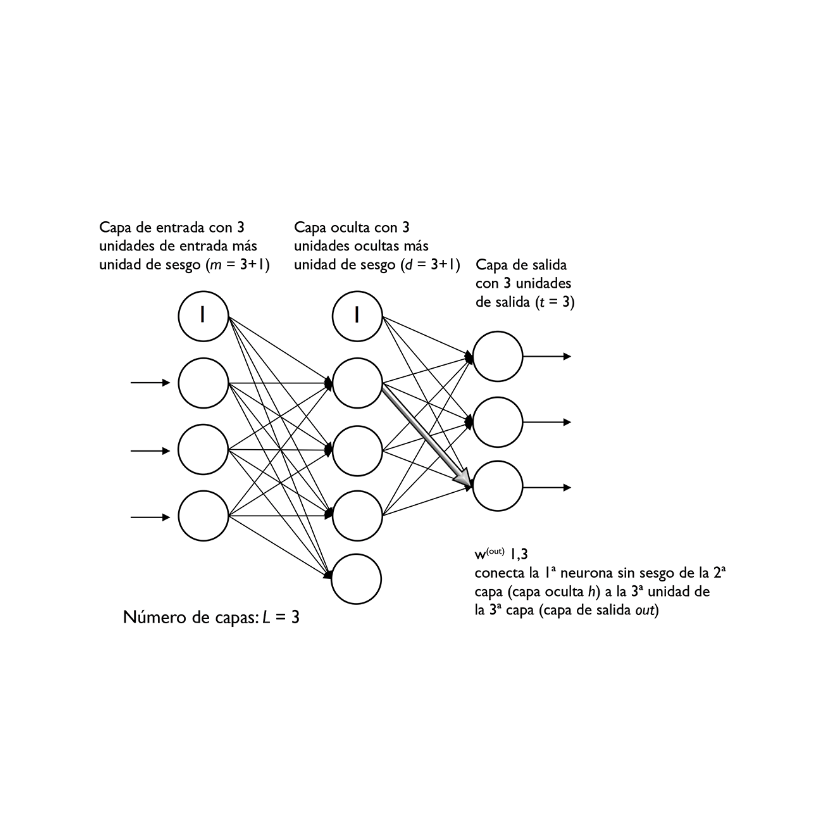

In [7]:
grid.raster(readPNG('D:/R/3. Nivel III/5/imagenes/12_03.png'), width=0.8)

In [6]:
h2o.shutdown() #finaliza la sesión con H20

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_8d04 closed.
